In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/home/yashjonjale/Documents/intern_proj/Dataset/Sabio_dat/Sabio_raw_data.csv')

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,EntryID,Organism,UniprotID,ECNumber,Pathway,parameter.type,parameter.associatedSpecies,parameter.startValue,...,KeggReactionID,PubMedID,Substrate,Product,Inhibitor,Cofactor,Activator,PubChemID,Tissue,CellularLocation
0,0,0,1,Bacillus lentus,NaN,3.4.21.62,Protein export,kcat,NaN,2.200000e+02,...,NaN,12962477.0,Peptide;H2O,Peptide,N-(Carbobenzoxy)-Leu-Leu-Phe-trifluoromethylke...,NaN,NaN,3314;3303,-,"[unknown, unknown, unknown, unknown, unknown, ..."
1,1,1,1,Bacillus lentus,NaN,3.4.21.62,Protein export,kcat/Km,Peptide,1.200000e+05,...,NaN,12962477.0,Peptide;H2O,Peptide,N-(Carbobenzoxy)-Leu-Leu-Phe-trifluoromethylke...,NaN,NaN,3314;3303,-,"[unknown, unknown, unknown, unknown, unknown, ..."
2,2,2,1,Bacillus lentus,NaN,3.4.21.62,Protein export,Ki,N-(Carbobenzoxy)-Leu-Leu-Phe-trifluoromethylke...,1.800000e-08,...,NaN,12962477.0,Peptide;H2O,Peptide,N-(Carbobenzoxy)-Leu-Leu-Phe-trifluoromethylke...,NaN,NaN,3314;3303,-,"[unknown, unknown, unknown, unknown, unknown, ..."
3,3,3,1,Bacillus lentus,NaN,3.4.21.62,Protein export,Km,Peptide,1.900000e-03,...,NaN,12962477.0,Peptide;H2O,Peptide,N-(Carbobenzoxy)-Leu-Leu-Phe-trifluoromethylke...,NaN,NaN,3314;3303,-,"[unknown, unknown, unknown, unknown, unknown, ..."
4,4,4,10,Pseudomonas putida,P20932,1.1.99.31,Aminobenzoate degradation,Km,(S)-Mandelate,2.300000e-03,...,R07664,15311930.0,(S)-Mandelate;Riboflavin-5-phosphate,Reduced FMN;alpha-Oxo-benzeneacetic acid,NaN,NaN,NaN,4964;5081;5216;3361,-,"[membrane, membrane, membrane, membrane, membr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44640,44640,44640,19863,Rattus norvegicus,NaN,3.1.3.4,Sphingolipid metabolism,concentration,Sphinganine 1-phosphate,0.000000e+00,...,R06520,7575445.0,H2O;Sphinganine 1-phosphate,Sphinganine;Phosphate,NaN,NaN,NaN,4094;3303;3311;4351,liver,"[unknown, unknown, unknown, unknown, unknown]"
44641,44641,44641,19863,Rattus norvegicus,NaN,3.1.3.4,Sphingolipid metabolism,Vmax,NaN,2.366667e-09,...,R06520,7575445.0,H2O;Sphinganine 1-phosphate,Sphinganine;Phosphate,NaN,NaN,NaN,4094;3303;3311;4351,liver,"[unknown, unknown, unknown, unknown, unknown]"
44642,44642,44642,19864,Rattus norvegicus,NaN,3.1.3.4,Sphingolipid metabolism,Vmax,NaN,NaN,...,R06520,7575445.0,H2O;Sphinganine 1-phosphate,Phosphate;Sphinganine,NaN,NaN,NaN,4094;3303;3311;4351,liver,"[unknown, unknown, unknown, unknown, unknown]"
44643,44643,44643,19864,Rattus norvegicus,NaN,3.1.3.4,Sphingolipid metabolism,concentration,Sphinganine 1-phosphate,NaN,...,R06520,7575445.0,H2O;Sphinganine 1-phosphate,Phosphate;Sphinganine,NaN,NaN,NaN,4094;3303;3311;4351,liver,"[unknown, unknown, unknown, unknown, unknown]"


Organism UniprotID ECNumber if parameter.type == Km parameter.startValue

parameter.unit

parameter.standardDeviation

Substrate

EnzymeType



In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'EntryID', 'Organism', 'UniprotID',
       'ECNumber', 'Pathway', 'parameter.type', 'parameter.associatedSpecies',
       'parameter.startValue', 'parameter.endValue',
       'parameter.standardDeviation', 'parameter.unit', 'EnzymeType',
       'temperature', 'pH', 'Enzymename', 'KeggReactionID', 'PubMedID',
       'Substrate', 'Product', 'Inhibitor', 'Cofactor', 'Activator',
       'PubChemID', 'Tissue', 'CellularLocation'],
      dtype='object')

In [6]:
#drop the columns starting with Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.columns

Index(['EntryID', 'Organism', 'UniprotID', 'ECNumber', 'Pathway',
       'parameter.type', 'parameter.associatedSpecies', 'parameter.startValue',
       'parameter.endValue', 'parameter.standardDeviation', 'parameter.unit',
       'EnzymeType', 'temperature', 'pH', 'Enzymename', 'KeggReactionID',
       'PubMedID', 'Substrate', 'Product', 'Inhibitor', 'Cofactor',
       'Activator', 'PubChemID', 'Tissue', 'CellularLocation'],
      dtype='object')

Organism UniprotID ECNumber if parameter.type == Km parameter.startValue

parameter.unit

parameter.standardDeviation

Substrate

EnzymeType

#create a new with the above columns




In [8]:
columns_to_keep = ['Organism', 'UniprotID', 'ECNumber','parameter.type', 'parameter.startValue', 'parameter.unit', 'parameter.standardDeviation', 'Substrate', 'EnzymeType','PubChemID']
df = df[columns_to_keep]

In [9]:
df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,parameter.standardDeviation,Substrate,EnzymeType,PubChemID
0,Bacillus lentus,NaN,3.4.21.62,kcat,2.200000e+02,s^(-1),NaN,Peptide;H2O,wildtype variant DSAI (N76D/N87S/S103A/V104I),3314;3303
1,Bacillus lentus,NaN,3.4.21.62,kcat/Km,1.200000e+05,M^(-1)*s^(-1),NaN,Peptide;H2O,wildtype variant DSAI (N76D/N87S/S103A/V104I),3314;3303
2,Bacillus lentus,NaN,3.4.21.62,Ki,1.800000e-08,M,NaN,Peptide;H2O,wildtype variant DSAI (N76D/N87S/S103A/V104I),3314;3303
3,Bacillus lentus,NaN,3.4.21.62,Km,1.900000e-03,M,NaN,Peptide;H2O,wildtype variant DSAI (N76D/N87S/S103A/V104I),3314;3303
4,Pseudomonas putida,P20932,1.1.99.31,Km,2.300000e-03,M,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361
...,...,...,...,...,...,...,...,...,...,...
44640,Rattus norvegicus,NaN,3.1.3.4,concentration,0.000000e+00,M,-,H2O;Sphinganine 1-phosphate,wildtype,4094;3303;3311;4351
44641,Rattus norvegicus,NaN,3.1.3.4,Vmax,2.366667e-09,mol*s^(-1)*g^(-1),-,H2O;Sphinganine 1-phosphate,wildtype,4094;3303;3311;4351
44642,Rattus norvegicus,NaN,3.1.3.4,Vmax,NaN,-,-,H2O;Sphinganine 1-phosphate,wildtype,4094;3303;3311;4351
44643,Rattus norvegicus,NaN,3.1.3.4,concentration,NaN,-,-,H2O;Sphinganine 1-phosphate,wildtype,4094;3303;3311;4351


In [10]:
#iterate over the df

for index, row in df.iterrows():
    if row['parameter.type'] != 'Km':
        df.drop(index, inplace=True)

In [16]:
new_df = df

In [11]:
len(df)

8375

In [12]:
df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,parameter.standardDeviation,Substrate,EnzymeType,PubChemID
3,Bacillus lentus,NaN,3.4.21.62,Km,0.001900,M,NaN,Peptide;H2O,wildtype variant DSAI (N76D/N87S/S103A/V104I),3314;3303
4,Pseudomonas putida,P20932,1.1.99.31,Km,0.002300,M,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361
9,Pseudomonas putida,P20932,1.1.99.31,Km,0.000170,M,6.0E-5,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81V,5081;5216;3361;4964
10,Pseudomonas putida,P20932,1.1.99.31,Km,0.002000,M,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81D,5081;5216;3361;4964
14,Pseudomonas putida,P20932,1.1.99.31,Km,0.000090,M,1.0E-5,Riboflavin-5-phosphate;(S)-Mandelate,mutant chimeric MDH-GOX2,5216;3361;5081;4964
...,...,...,...,...,...,...,...,...,...,...
44622,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.000258,M,8.0E-6,NADP+;6-Phospho-D-gluconate,wildtype,3307;3380;3638;3313;3499;3308
44631,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.000356,M,-,NADP+;6-Phospho-D-gluconate,wildtype,3380;3308;3313;3638;3307;3499
44635,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.000162,M,-,NADP+;6-Phospho-D-gluconate,wildtype,3308;3380;3499;3638;3313;3307
44639,Rattus norvegicus,NaN,3.1.3.4,Km,0.000009,M,-,H2O;Sphinganine 1-phosphate,wildtype,4094;3303;3311;4351


In [17]:
new_df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,parameter.standardDeviation,Substrate,EnzymeType,PubChemID
3,Bacillus lentus,NaN,3.4.21.62,Km,1.900,mM,NaN,Peptide;H2O,wildtype variant DSAI (N76D/N87S/S103A/V104I),3314;3303
4,Pseudomonas putida,P20932,1.1.99.31,Km,2.300,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361
9,Pseudomonas putida,P20932,1.1.99.31,Km,0.170,mM,6.0E-5,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81V,5081;5216;3361;4964
10,Pseudomonas putida,P20932,1.1.99.31,Km,2.000,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81D,5081;5216;3361;4964
14,Pseudomonas putida,P20932,1.1.99.31,Km,0.090,mM,1.0E-5,Riboflavin-5-phosphate;(S)-Mandelate,mutant chimeric MDH-GOX2,5216;3361;5081;4964
...,...,...,...,...,...,...,...,...,...,...
44622,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.258,mM,8.0E-6,NADP+;6-Phospho-D-gluconate,wildtype,3307;3380;3638;3313;3499;3308
44631,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.356,mM,-,NADP+;6-Phospho-D-gluconate,wildtype,3380;3308;3313;3638;3307;3499
44635,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.162,mM,-,NADP+;6-Phospho-D-gluconate,wildtype,3308;3380;3499;3638;3313;3307
44639,Rattus norvegicus,NaN,3.1.3.4,Km,0.009,mM,-,H2O;Sphinganine 1-phosphate,wildtype,4094;3303;3311;4351


In [13]:
#iterate over the rows and convert the parameter,unit to mM
for index, row in df.iterrows():
    if row['parameter.unit'] == 'M':
        df.at[index, 'parameter.startValue'] = df.at[index, 'parameter.startValue']*1000
        df.at[index, 'parameter.unit'] = 'mM'

In [14]:
df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,parameter.standardDeviation,Substrate,EnzymeType,PubChemID
3,Bacillus lentus,NaN,3.4.21.62,Km,1.900,mM,NaN,Peptide;H2O,wildtype variant DSAI (N76D/N87S/S103A/V104I),3314;3303
4,Pseudomonas putida,P20932,1.1.99.31,Km,2.300,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361
9,Pseudomonas putida,P20932,1.1.99.31,Km,0.170,mM,6.0E-5,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81V,5081;5216;3361;4964
10,Pseudomonas putida,P20932,1.1.99.31,Km,2.000,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81D,5081;5216;3361;4964
14,Pseudomonas putida,P20932,1.1.99.31,Km,0.090,mM,1.0E-5,Riboflavin-5-phosphate;(S)-Mandelate,mutant chimeric MDH-GOX2,5216;3361;5081;4964
...,...,...,...,...,...,...,...,...,...,...
44622,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.258,mM,8.0E-6,NADP+;6-Phospho-D-gluconate,wildtype,3307;3380;3638;3313;3499;3308
44631,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.356,mM,-,NADP+;6-Phospho-D-gluconate,wildtype,3380;3308;3313;3638;3307;3499
44635,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.162,mM,-,NADP+;6-Phospho-D-gluconate,wildtype,3308;3380;3499;3638;3313;3307
44639,Rattus norvegicus,NaN,3.1.3.4,Km,0.009,mM,-,H2O;Sphinganine 1-phosphate,wildtype,4094;3303;3311;4351


In [18]:
#delete rows with NaN Uniprot IDs

df = df.dropna(subset=['UniprotID'])


In [19]:
df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,parameter.standardDeviation,Substrate,EnzymeType,PubChemID
4,Pseudomonas putida,P20932,1.1.99.31,Km,2.300,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361
9,Pseudomonas putida,P20932,1.1.99.31,Km,0.170,mM,6.0E-5,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81V,5081;5216;3361;4964
10,Pseudomonas putida,P20932,1.1.99.31,Km,2.000,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81D,5081;5216;3361;4964
14,Pseudomonas putida,P20932,1.1.99.31,Km,0.090,mM,1.0E-5,Riboflavin-5-phosphate;(S)-Mandelate,mutant chimeric MDH-GOX2,5216;3361;5081;4964
18,Pseudomonas putida,P20932,1.1.99.31,Km,0.040,mM,5.0E-6,(S)-Mandelate;Riboflavin-5-phosphate,mutant G81A of chimeric MDH-GOX2,5216;5081;4964;3361
...,...,...,...,...,...,...,...,...,...,...
44608,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.019,mM,1.0E-6,NADP+;6-Phospho-D-gluconate,wildtype,3313;3638;3308;3307;3499;3380
44613,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.056,mM,2.0E-6,6-Phospho-D-gluconate;NADP+,wildtype,3638;3308;3499;3307;3313;3380
44622,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.258,mM,8.0E-6,NADP+;6-Phospho-D-gluconate,wildtype,3307;3380;3638;3313;3499;3308
44631,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.356,mM,-,NADP+;6-Phospho-D-gluconate,wildtype,3380;3308;3313;3638;3307;3499


In [20]:
#delete rows with NaN parameter.startValue

df = df.dropna(subset=['parameter.startValue'])

In [21]:
df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,parameter.standardDeviation,Substrate,EnzymeType,PubChemID
4,Pseudomonas putida,P20932,1.1.99.31,Km,2.300,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361
9,Pseudomonas putida,P20932,1.1.99.31,Km,0.170,mM,6.0E-5,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81V,5081;5216;3361;4964
10,Pseudomonas putida,P20932,1.1.99.31,Km,2.000,mM,2.0E-4,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81D,5081;5216;3361;4964
14,Pseudomonas putida,P20932,1.1.99.31,Km,0.090,mM,1.0E-5,Riboflavin-5-phosphate;(S)-Mandelate,mutant chimeric MDH-GOX2,5216;3361;5081;4964
18,Pseudomonas putida,P20932,1.1.99.31,Km,0.040,mM,5.0E-6,(S)-Mandelate;Riboflavin-5-phosphate,mutant G81A of chimeric MDH-GOX2,5216;5081;4964;3361
...,...,...,...,...,...,...,...,...,...,...
44608,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.019,mM,1.0E-6,NADP+;6-Phospho-D-gluconate,wildtype,3313;3638;3308;3307;3499;3380
44613,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.056,mM,2.0E-6,6-Phospho-D-gluconate;NADP+,wildtype,3638;3308;3499;3307;3313;3380
44622,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.258,mM,8.0E-6,NADP+;6-Phospho-D-gluconate,wildtype,3307;3380;3638;3313;3499;3308
44631,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.356,mM,-,NADP+;6-Phospho-D-gluconate,wildtype,3380;3308;3313;3638;3307;3499


In [22]:
#delete the column -> parameter.standardDeviation

df = df.drop(columns=['parameter.standardDeviation'])

In [23]:
df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,Substrate,EnzymeType,PubChemID
4,Pseudomonas putida,P20932,1.1.99.31,Km,2.300,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361
9,Pseudomonas putida,P20932,1.1.99.31,Km,0.170,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81V,5081;5216;3361;4964
10,Pseudomonas putida,P20932,1.1.99.31,Km,2.000,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81D,5081;5216;3361;4964
14,Pseudomonas putida,P20932,1.1.99.31,Km,0.090,mM,Riboflavin-5-phosphate;(S)-Mandelate,mutant chimeric MDH-GOX2,5216;3361;5081;4964
18,Pseudomonas putida,P20932,1.1.99.31,Km,0.040,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant G81A of chimeric MDH-GOX2,5216;5081;4964;3361
...,...,...,...,...,...,...,...,...,...
44608,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.019,mM,NADP+;6-Phospho-D-gluconate,wildtype,3313;3638;3308;3307;3499;3380
44613,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.056,mM,6-Phospho-D-gluconate;NADP+,wildtype,3638;3308;3499;3307;3313;3380
44622,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.258,mM,NADP+;6-Phospho-D-gluconate,wildtype,3307;3380;3638;3313;3499;3308
44631,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.356,mM,NADP+;6-Phospho-D-gluconate,wildtype,3380;3308;3313;3638;3307;3499


In [27]:
df['parameter.unit'].unique()

array(['mM', 'mg/ml', 'M^2'], dtype=object)

In [29]:
#iterate over the rows and convert the parameter.startValue to float

for index, row in df.iterrows():
    if row['parameter.unit'] == 'M^2':
        #drop the row
        df.drop(index, inplace=True)

In [30]:
len(df)

6864

In [31]:
len(new_df)

8375

In [24]:
enz_type = df['EnzymeType']

In [47]:
#iterate over enz_type 
num = 0
for index, value in enz_type.items():
    #check regex ^wild*, and increment num
    if value.startswith('wild'):
        num = num + 1

In [48]:
num

4185

In [49]:
import re

pattern = r'([A-Z]\d+[A-Z])(\/[A-Z]\d+[A-Z])*'
test_string = "iowne A12B/A2B/A123J"

x = re.search(pattern, test_string)
print(x)

<re.Match object; span=(6, 20), match='A12B/A2B/A123J'>


In [50]:
x.group()

'A12B/A2B/A123J'

In [51]:
enz_type    

4                         mutant MDH G81S
9                         mutant MDH G81V
10                        mutant MDH G81D
14               mutant chimeric MDH-GOX2
18       mutant G81A of chimeric MDH-GOX2
                       ...               
44608                            wildtype
44613                            wildtype
44622                            wildtype
44631                            wildtype
44635                            wildtype
Name: EnzymeType, Length: 6870, dtype: object

In [32]:
# create two new columns : if_mutated and mutation
df['if_mutated'] = '-'
df['mutation'] = '-'

In [34]:
#iterate over the df and check if the EnzymeType is wild or mutated
import re
new_df1 = df
num1 = 0
pattern = r'([A-Z]\d+[A-Z])(\/[A-Z]\d+[A-Z])*'
for index, row in df.iterrows():
    if row['EnzymeType'].startswith('wild'):
        df.at[index, 'if_mutated'] = 'no'
    else:
        df.at[index, 'if_mutated'] = 'yes'
        comment = row['EnzymeType']
        # print(comment)
        z = re.search(pattern, comment)
        if z == None:
            #delete row at this index
            df.drop(index, inplace=True)
            num1 = num1 + 1
            continue
        comm = z.group()
        if '/' not in comm:
            df.at[index, 'mutation'] = [comm]
        else:
            df.at[index, 'mutation'] = comm.split('/')

In [35]:
num1

212

In [36]:
len(df)

6652

In [37]:
#find the number of mutated enzymes
num_mutated = 0

for index, row in df.iterrows():
    if row['if_mutated'] == 'yes':
        num_mutated = num_mutated + 1
print(num_mutated)

2469


In [38]:
df

,Organism,UniprotID,ECNumber,parameter.type,parameter.startValue,parameter.unit,Substrate,EnzymeType,PubChemID,if_mutated,mutation
4,Pseudomonas putida,P20932,1.1.99.31,Km,2.300,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81S,4964;5081;5216;3361,yes,[G81S]
9,Pseudomonas putida,P20932,1.1.99.31,Km,0.170,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81V,5081;5216;3361;4964,yes,[G81V]
10,Pseudomonas putida,P20932,1.1.99.31,Km,2.000,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant MDH G81D,5081;5216;3361;4964,yes,[G81D]
18,Pseudomonas putida,P20932,1.1.99.31,Km,0.040,mM,(S)-Mandelate;Riboflavin-5-phosphate,mutant G81A of chimeric MDH-GOX2,5216;5081;4964;3361,yes,[G81A]
20,Pseudomonas putida,P20932,1.1.99.31,Km,3.200,mM,O2;Reduced FMN,wildtype MDH,3309;4964;3329;3361,no,-
...,...,...,...,...,...,...,...,...,...,...,...
44608,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.019,mM,NADP+;6-Phospho-D-gluconate,wildtype,3313;3638;3308;3307;3499;3380,no,-
44613,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.056,mM,6-Phospho-D-gluconate;NADP+,wildtype,3638;3308;3499;3307;3313;3380,no,-
44622,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.258,mM,NADP+;6-Phospho-D-gluconate,wildtype,3307;3380;3638;3313;3499;3308,no,-
44631,Rattus norvegicus,Q7TP11,1.1.1.44,Km,0.356,mM,NADP+;6-Phospho-D-gluconate,wildtype,3380;3308;3313;3638;3307;3499,no,-


In [39]:
#verify if if_mutated is yes, then mutation is not '-'
for index, row in df.iterrows():
    if row['if_mutated'] == 'yes':
        if row['mutation'] == '-':
            print(index)

In [40]:
#delete the column EnzymeType
df = df.drop(columns=['EnzymeType'])

In [43]:
df = df.drop(columns=['parameter.type'])

In [44]:
df

,Organism,UniprotID,ECNumber,parameter.startValue,parameter.unit,Substrate,PubChemID,if_mutated,mutation
4,Pseudomonas putida,P20932,1.1.99.31,2.300,mM,(S)-Mandelate;Riboflavin-5-phosphate,4964;5081;5216;3361,yes,[G81S]
9,Pseudomonas putida,P20932,1.1.99.31,0.170,mM,(S)-Mandelate;Riboflavin-5-phosphate,5081;5216;3361;4964,yes,[G81V]
10,Pseudomonas putida,P20932,1.1.99.31,2.000,mM,(S)-Mandelate;Riboflavin-5-phosphate,5081;5216;3361;4964,yes,[G81D]
18,Pseudomonas putida,P20932,1.1.99.31,0.040,mM,(S)-Mandelate;Riboflavin-5-phosphate,5216;5081;4964;3361,yes,[G81A]
20,Pseudomonas putida,P20932,1.1.99.31,3.200,mM,O2;Reduced FMN,3309;4964;3329;3361,no,-
...,...,...,...,...,...,...,...,...,...
44608,Rattus norvegicus,Q7TP11,1.1.1.44,0.019,mM,NADP+;6-Phospho-D-gluconate,3313;3638;3308;3307;3499;3380,no,-
44613,Rattus norvegicus,Q7TP11,1.1.1.44,0.056,mM,6-Phospho-D-gluconate;NADP+,3638;3308;3499;3307;3313;3380,no,-
44622,Rattus norvegicus,Q7TP11,1.1.1.44,0.258,mM,NADP+;6-Phospho-D-gluconate,3307;3380;3638;3313;3499;3308,no,-
44631,Rattus norvegicus,Q7TP11,1.1.1.44,0.356,mM,NADP+;6-Phospho-D-gluconate,3380;3308;3313;3638;3307;3499,no,-


In [47]:
#sort by ECNumber in ascending order
df = df.sort_values(by=['ECNumber'])

In [50]:
df

,Organism,UniprotID,ECNumber,parameter.startValue,parameter.unit,Substrate,PubChemID,if_mutated,mutation
4529,Arabidopsis thaliana,Q84UC7,-,2.1700,mM,L-Ornithine,3377,no,-
40188,Streptococcus pyogenes,Q7DAM2 Q48U44,-,0.0078,mM,H2O;Immunoglobulin G1,3314;3303,no,-
35505,Homo sapiens,Q9NS18,-,0.3000,mM,L-Cystine;NADPH;H+,3397;3307;3308;3774;3380,no,-
35498,Homo sapiens,Q9NS18,-,1.7700,mM,H+;S-Sulfo-L-cysteine;NADPH,3359;3307;3397;3380;8119;3308,no,-
40167,Streptococcus pyogenes,Q48U44 Q7DAM2,-,0.0068,mM,Immunoglobulin G1;H2O,3303;3314,no,-
...,...,...,...,...,...,...,...,...,...
3510,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.3600,mM,Na+;K+;H2O;ATP,4541;3304;3303;3311;3310;3537,no,-
3507,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.4300,mM,ATP;K+;Na+;H2O,4541;3310;3304;3311;3537;3303,no,-
3506,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.5400,mM,Na+;K+;H2O;ATP,3537;3310;3304;3303;3311;4541,no,-
3502,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.5300,mM,ATP;Na+;H2O;K+,3537;3310;3304;4541;3303;3311,no,-


In [51]:
#find the number of rows for which no ECNumber is given
num_no_ECNumber = 0
for index, row in df.iterrows():
    if row['ECNumber'] == '-':
        num_no_ECNumber = num_no_ECNumber + 1

In [52]:
num_no_ECNumber

25

In [53]:
#delete the rows with no ECNumber
df = df[df.ECNumber != '-']

In [54]:
df

,Organism,UniprotID,ECNumber,parameter.startValue,parameter.unit,Substrate,PubChemID,if_mutated,mutation
15662,Enterococcus faecium,Q05709,1.1.1,31.00,mM,4-Methyl-2-oxopentanoate;H+;NADPH,3308;3307;3532;3380;6128,no,-
15642,Enterococcus faecium,Q05709,1.1.1,2.60,mM,NADPH;H+;2-Oxobutyrate,3380;3409;3307;3308,no,-
15650,Enterococcus faecium,Q05709,1.1.1,150.00,mM,H+;alpha-Ketovaline;NADPH,3307;3441;3308;3380,no,-
15637,Enterococcus faecium,Q05709,1.1.1,1.45,mM,NADPH;H+;Pyruvate,3307;3555;3380;3324;3308,no,-
1808,Bacillus subtilis,P46336,1.1.1,271.00,mM,H+;NADPH;Glyceraldehyde,3307;3416;5231;3380;3308,no,-
...,...,...,...,...,...,...,...,...,...
3510,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.36,mM,Na+;K+;H2O;ATP,4541;3304;3303;3311;3310;3537,no,-
3507,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.43,mM,ATP;K+;Na+;H2O,4541;3310;3304;3311;3537;3303,no,-
3506,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.54,mM,Na+;K+;H2O;ATP,3537;3310;3304;3303;3311;4541,no,-
3502,Rattus norvegicus,P06685 P06686 P06687 Q64541 P07340 P13638 Q633...,7.2.2.13,0.53,mM,ATP;Na+;H2O;K+,3537;3310;3304;4541;3303;3311,no,-


In [55]:
#save as csv
df.to_csv('/home/yashjonjale/Documents/intern_proj/Dataset/Sabio_dat/Sabio_Km_data.csv', index=False)

In [64]:
# make different groups filtered based on the ECNumber and Substrate
grouped = df.groupby(['ECNumber', 'Substrate'])
subs_lst = []
num2 = 0
mean = []
#iterate over the groups and save them as csv
for name, group in grouped:
    num2+=1
    mean.append(len(group))
    subs_lst.append(name[1])
    group.to_csv('/home/yashjonjale/Documents/intern_proj/Dataset/Sabio_dat/grps/Sabio_Km_data_' + name[0] + '_' + name[1] + '.csv', index=False)

In [65]:
#Load the json files for substrate ids
import json

with open('/home/yashjonjale/Documents/intern_proj/Dataset/Sabio_dat/substr2substr_id.json') as f:
    sub_ids = json.load(f)


In [67]:
num = 0
for sub in subs_lst:
    if sub not in sub_ids:
        num = num + 1

In [68]:
num

2328

In [69]:
len(subs_lst)   

2333

In [57]:
num2

2333

In [59]:
np.mean(mean)

np.float64(2.8405486498071153)

In [60]:
np.median(mean)

np.float64(1.0)

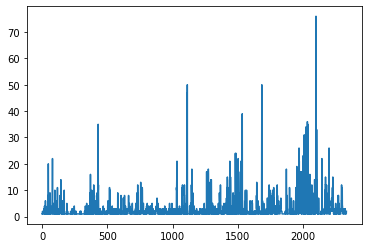

In [61]:
#describe the mean list
np.mean(mean)

np.median(mean)

np.std(mean)

np.min(mean)

np.max(mean)

#plot the mean list

plt.plot(mean)

plt.show()  




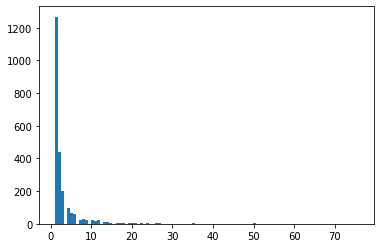

In [63]:
#make a histogram of the mean list
plt.hist(mean, bins=100)

plt.show()